<figure class="image" style="width:100%">
  <img src="https://i.imgur.com/nifzVtD.gif" 
       alt="Baby penguin waves and says 'Hello'." width="500px">
    <figcaption><h1><b><center><font color = "blue"> Welcome to our project!</font></center></b></h1></figcaption>
</figure>

# Group Project

>By Alejandro Tapia and Megan Cao

## Group Contributions Statement

>Both students contributed to the project equally. We found time outside of class to work on our project together, so that we were consistent in our work and were on the same page for everything. All of our work was collaborative.


<figure class="image" style="width:50%">
  <img src="https://i.gifer.com/7L6B.gif" 
               alt="Penguin splits screen from Advventure Time." width="500px">
</figure>

<font color = "teal">
    <h1> Data Acquisition </h1>

In this section, you should acquire your data and read it into Python:
    </font>

<font color = "teal">
<b> Here we will import all the necessary libraries for our project. </b>
    </font>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import tree, preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

<font color = "teal">

> **Now we are going to import the necessary penguin dataset for the project.**
The dataset will also be displayed for reference.
    </font>

In [2]:
url = "https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv"

penguins = pd.read_csv(url)
penguins

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


<font color = "teal">

> **Here we are going to set a seed to ensure that any random values generated will the same each time.**
    
</font>

In [3]:
np.random.seed(1234)

<font color = "purple">
    <h1> Exploratory Analysis </h1>
    
    
    
<figure class="image" style="width:50%">
  <img src="https://creazilla-store.fra1.digitaloceanspaces.com/cliparts/63208/penguin-teacher-clipart-md.png" 
               alt="Penguin on podium about to teach." width="300px">

<font color = "purple">
To properly analyze penguins, we want to focus on details of the penguins that we think will matter most to identifying the penguins of interest. 

The characteristics we are choosing:
- Species: to classify the penguins per group
- Body Mass: to classify the penguin based on species
- Culmen Length: to classify the penguin relative to other species
- Culmen Depth: to classify the penguin relative to other species

These four characteristics are sufficient data for determining the species of a penguin. Although other characteristics may be a factor of determination, with minimal information from the penguin, such as these bodily measurments, our data will allow for an accurate determination of species.  

</font>

<font color = "purple">
    <h2> Table 1 </h2>
    <b> Here we are creating a subset of data from the original penguins dataframe,<i> subpenguins.</i></b>
This subset of data will allow us focus on the characteristics we chose above without having to worry about our future figures and models intaking any excess information.
    </font>

In [4]:
subpenguins = penguins[["Species", "Culmen Length (mm)", 
                        "Culmen Depth (mm)", "Body Mass (g)"]]
subpenguins = subpenguins.dropna()
subpenguins

,Species,Culmen Length (mm),Culmen Depth (mm),Body Mass (g)
0,Adelie Penguin (Pygoscelis adeliae),39.1,18.7,3750.0
1,Adelie Penguin (Pygoscelis adeliae),39.5,17.4,3800.0
2,Adelie Penguin (Pygoscelis adeliae),40.3,18.0,3250.0
4,Adelie Penguin (Pygoscelis adeliae),36.7,19.3,3450.0
5,Adelie Penguin (Pygoscelis adeliae),39.3,20.6,3650.0
...,...,...,...,...
338,Gentoo penguin (Pygoscelis papua),47.2,13.7,4925.0
340,Gentoo penguin (Pygoscelis papua),46.8,14.3,4850.0
341,Gentoo penguin (Pygoscelis papua),50.4,15.7,5750.0
342,Gentoo penguin (Pygoscelis papua),45.2,14.8,5200.0


<font color = "purple">
    <h2> Figure 1 </h2>
Here we have made a scatter plot of the Culmen Length vs the Culmen Depth for each of the penguins species.
    From this visualization, we will be able to see how each species has a distinct range in its culmen length and culmen depth relationship. 

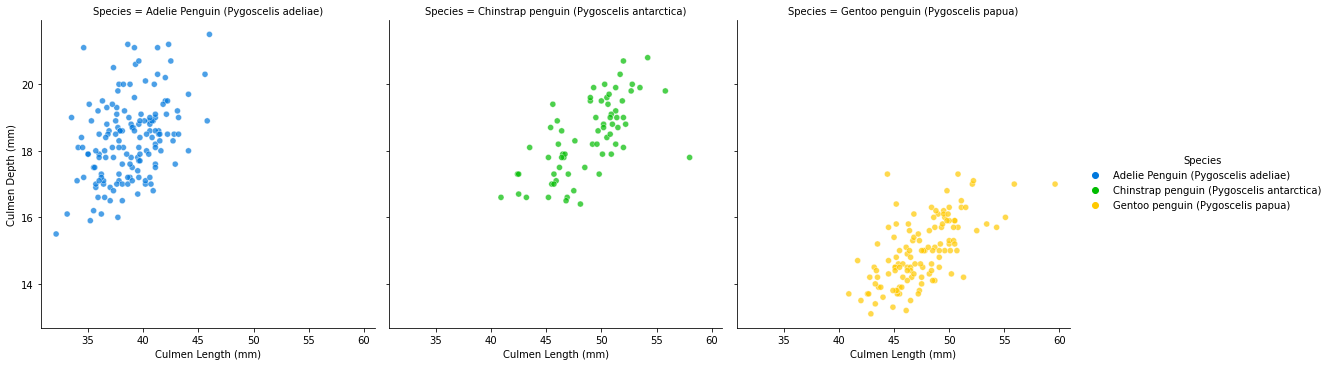

In [5]:
sns.relplot(data = subpenguins,
           x = "Culmen Length (mm)", y = "Culmen Depth (mm)",
           col = "Species", hue = "Species", col_wrap = 3,
           alpha = 0.7, estimator = None,
           kind = "scatter", palette = "nipy_spectral")

<font color = "purple">

### Figure 2
In this figure, we created a grid of data to show the relationships between the penguin characteristics we chose to work with. The diagonal plots are blank because the relationship of one characteristic with itself is 1, and frankly unnecessary for our penguin determinations. 

Relationship found from the data:
- **Culmen Depth vs. Culmen Length:** As mentioned and shown in **Figure 1**, each species has a distinct range in its relationshp of culmen length and culmen depth. 
    - The inverse relationship is shown with Culmen Length vs. Culmen Depth.  
    
    
- **Culmen Depth vs. Body Mass:** For the Gentoo penguin, there is a distinct range in its relationship with culmen depth and body mass. Whereas the Adelie and Chinstrap penguin intersect within this relatinship.
    - The inverse relationship is shown with Body Mass vs. Culmen Depth.
    
    
- **Culmen Length vs. Body Mass:** The penguins show a distinct range in its relationship with culmen length and body mass. However, in this graph, it would be easier to distinguish the Chinstrap penguin's relationship, since it does not falll within the linear pattern of the Gentoo and Adelie penguins. For the Gentoo and Adelie penguins, there would need to be a distinction between the two species' masses. 
    - The inverse relationship is shown with Body Mass vs. Culmen Length. 
    
    </font>

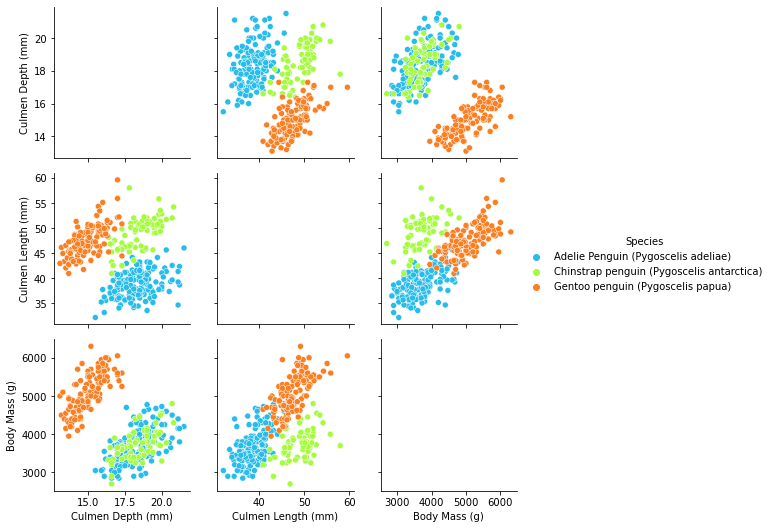

In [6]:
g = sns.PairGrid(subpenguins, vars=["Culmen Depth (mm)", 
                                    "Culmen Length (mm)", 
                                    "Body Mass (g)"], 
                 hue="Species", palette = "turbo")
g.map_offdiag(sns.scatterplot)
g.add_legend()

<font color = "purple">

### Figure 3
Within this figure we made 3 different boxplots to disply how each species can be distinguished from the characteristics of culmen length, culmen depth, and body mass. 
> On average, Gentoo penguins have a greater body mass and culmen depth. As mentioned before in **Figure 2: graph Culmen Depth vs Body Mass**, the Gentoo penguin will easily be distinguishable from the Chinstrap and Adelie penguin. Additionally, from these boxplots we can distinguish the Chinstrap and Adelie penguins from their respective culmen lengths. 
    


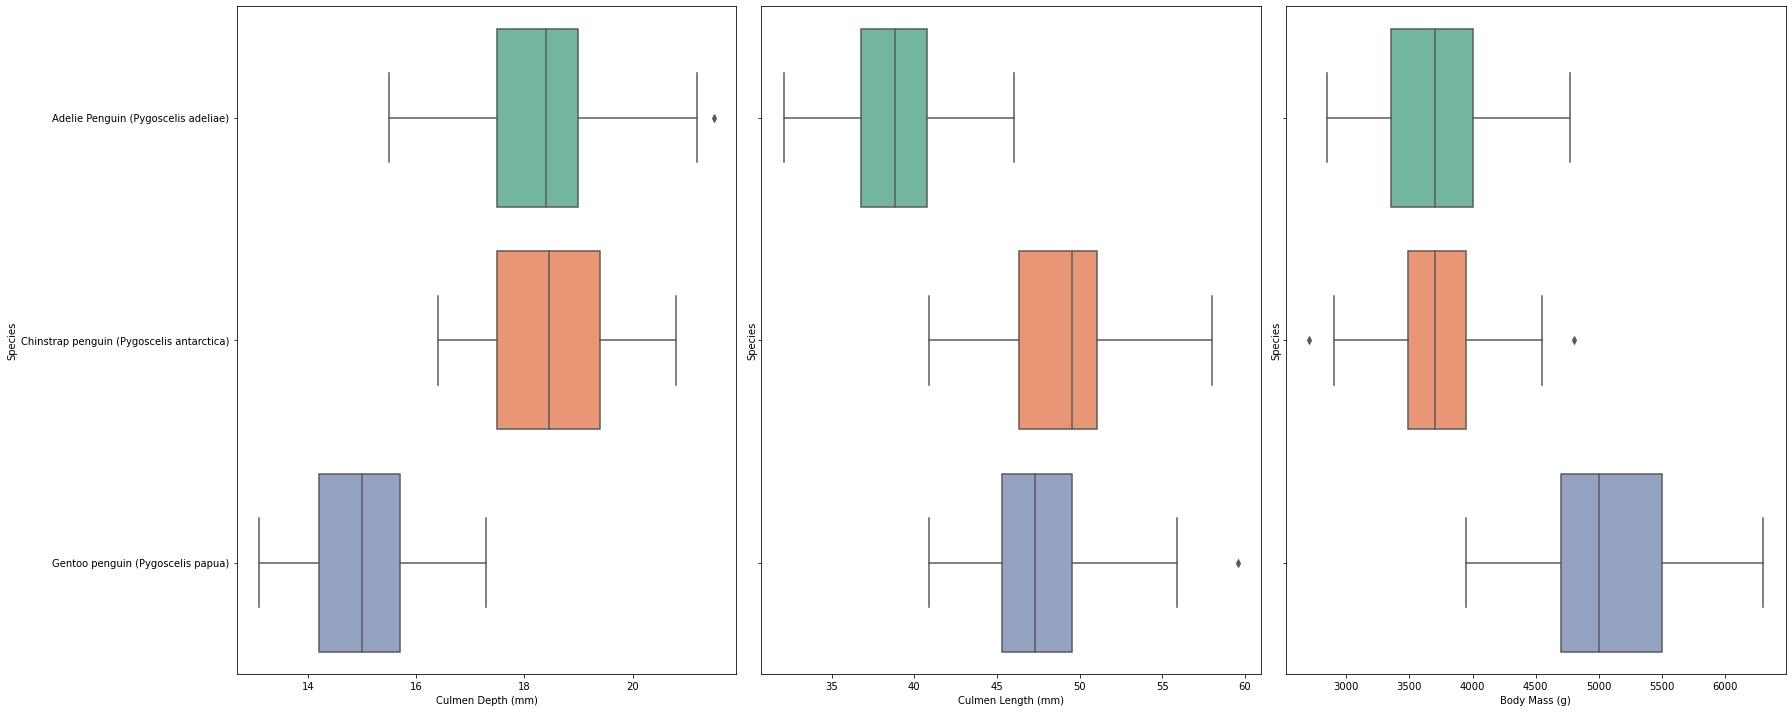

In [7]:
fig, axes = plt.subplots(1, 3, figsize = (25,10), sharey = True)

ax = sns.boxplot(data=subpenguins, x="Culmen Depth (mm)", 
                 y="Species", ax=axes[0], palette = "Set2")

ax = sns.boxplot(data=subpenguins, x="Culmen Length (mm)", 
                 y="Species", ax=axes[1], palette = "Set2")

ax = sns.boxplot(data=subpenguins, x="Body Mass (g)", 
                 y="Species", ax=axes[2], palette = "Set2")

plt.tight_layout()

<font color = "purple">

## Data Preparation
> **We are going to split our data into a training and test set for our future models!** This data uses a minimal number of columns (3) from the original data set and will be used on our model to achieve high prediction accuracy of species. 

**subpenguins** represents only Culmen Length, Culmen Depth, and Body Mass

In [8]:
# transforming our species column and data into integers
le=preprocessing.LabelEncoder()
subpenguins['Species']=le.fit_transform(subpenguins['Species'])

X = subpenguins.drop(['Species'], axis = 1)
y = subpenguins['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                test_size = 0.2)

<font color = "green">

# Modeling

<figure class="image" style="width:50%">
  <img src="https://media0.giphy.com/media/3oFzm4veCWpRMLGMso/200w.gif?cid=82a1493b5vzrallus3pip1860ykols2dg8blaxlxadka7ncu&rid=200w.gif&ct=g" 
       alt="Modeling penguin B)." width="300px">
</figure>

<font color = "green">

## Cross Validation
> First we are going to cross validate our data to find the best depth for our decision tree. We use cross validations because it is a highly efficient tool for estimating the optimal complexity of a model. The function in use, cross_val_score helps us by automating the process of K-fold Cross-Validation. With it, we are able ot obtain an average of the CV scores based on the training data to help us determine the best_score that we will use as our depth. The scatter plot below illustrates the accuracy of the model as its depth increases, helping us visualize the best_score

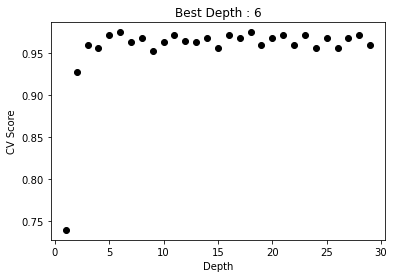

In [9]:
from sklearn.model_selection import cross_val_score 

fig, ax1 = plt.subplots(1)

best_score = 0

for d in range(1,30):
    T = tree.DecisionTreeClassifier(max_depth = d)
    cv_score = cross_val_score(T, X_train, y_train, cv=5).mean() 
    ax1.scatter(d, cv_score, color = "black")
    
    if cv_score > best_score:
        best_depth = d 
        best_score = cv_score

l = ax1.set(title = "Best Depth : " + str(best_depth), 
           xlabel = "Depth",
            ylabel = "CV Score")

In [10]:
T = tree.DecisionTreeClassifier(max_depth=6) 
T.fit(X_train, y_train)
T.score(X_train, y_train), T.score(X_test, y_test)

(0.9963369963369964, 0.9565217391304348)

In [11]:
T = tree.DecisionTreeClassifier(max_depth=best_depth) 
T.fit(X_train, y_train)
T.score(X_test, y_test)

0.9565217391304348

<font color = "green">

## Model 1: Decision Tree
> As shown prior, the best depth of our model was computed to be 6. This means that the our model will have a depth of 6, which will allow it to have a higher accuracy on unseen testing data as compared to any other depth we tested between 1 and 30. The Decision Tree below illustrates the decision process that produces the highest accuracy on unseen testing data. The first thing the Decision tree looks at is the Culmen Length (seen at the top node) , followed by Culmen Depth by both sides in the next level, etc. This mechanism allows it to determine the path the test data will follow in order to come to a conclusion about the species of the penguin in question.

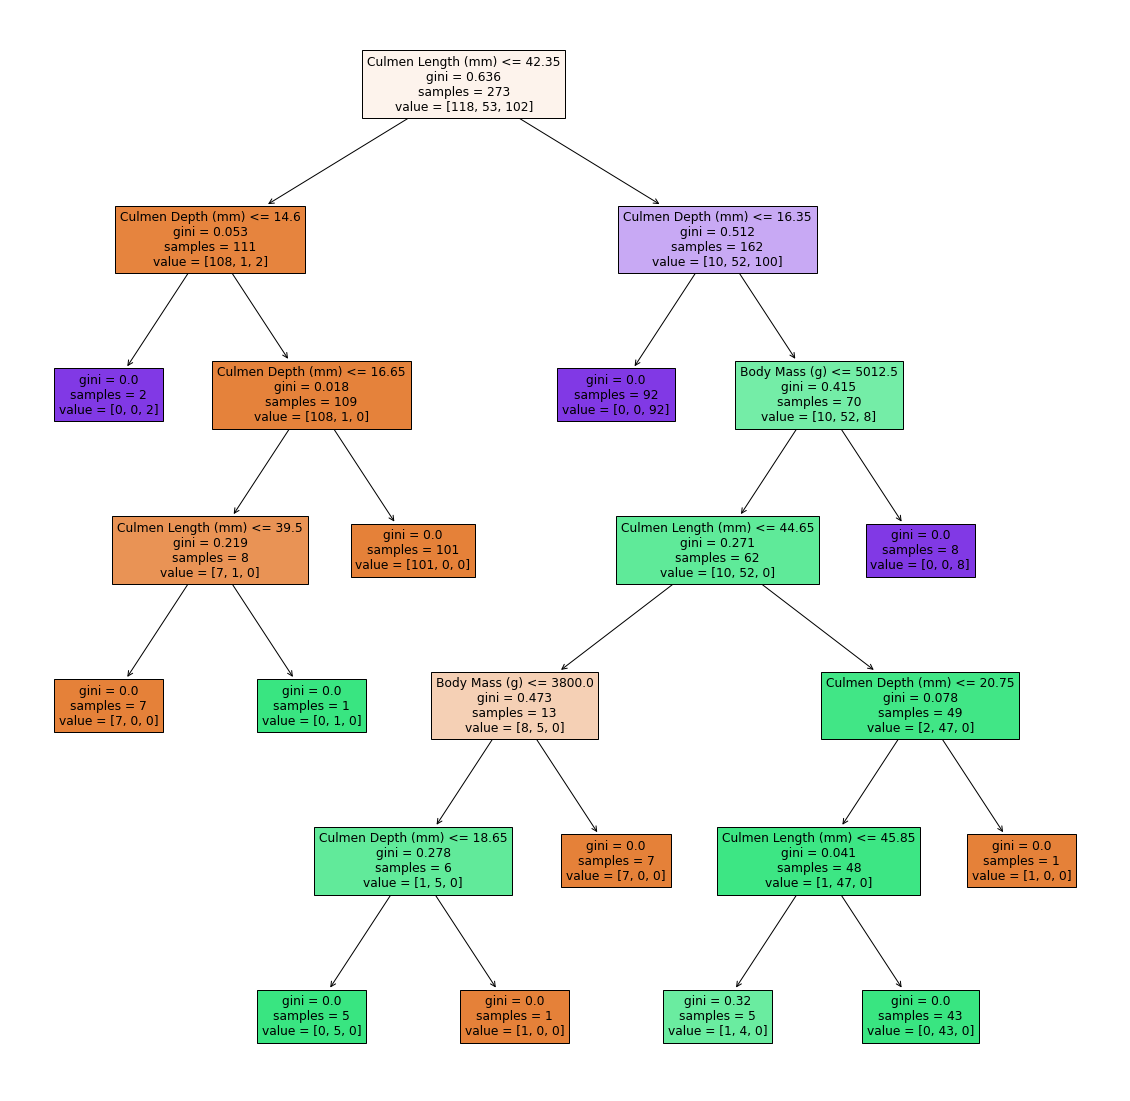

In [12]:
fig, ax = plt.subplots(1, figsize = (20, 20))
p = tree.plot_tree(T, filled = True, feature_names = X.columns)

<font color = "green">

## Model 2: Logistic Regression
> This model uses a function plot_regions to create and visualize decision regions, whose purpose is to help us understand how machine learning perceives the data and optomizes to predict the species of future unseen data. Each member of a unique species is represented by the colors of the dots; red, green, and pink. The function trains a model with the aim of classifying each point on a 2d grid through the use of decision regions. The location where two different decision regions meet are known as decision boundaries. These decision boundaries denote the area of the decision regions, also colored red, green, and pink. They represent the computers decision in classifying a data point based on its location in the grid, and which decision region it is in. This plot below is in the form of Logistic Regression, whose decision boundaries are straight lines.

In [13]:
def plot_regions(c,X,y):
    """
    Plots the decision regions of a classifier
    c: the classifier
    X: predictor variables
    y: target variable
    """
    
    #fit model
    c.fit(X,y)


    #no i need to make a 2d grid of all the points and then
    #attempt to predict at all these points
    grid_x=np.linspace(x0.min(),x0.max(),501)
    grid_y=np.linspace(x1.min(),x1.max(),501)
    xx,yy=np.meshgrid(grid_x,grid_y)


    # machine learning models like decision trees like 1-d data
    XX=xx.ravel()
    YY=yy.ravel()
    
    #make predictions
    p=c.predict(np.c_[XX,YY])

    #reshape p back into a 2d array
    p=p.reshape(xx.shape)

    fig,ax = plt.subplots(1) #creates the fig and the ax 
    ax.contourf(xx,yy,p,cmap="gist_rainbow",alpha=.2) # plots decision boundaries
    ax.scatter(x0,x1,c=y,cmap="gist_rainbow") #this plots the points


    #labeling our axis
    ax.set(xlabel="Culmen Length (mm)",ylabel="Culmen Depth (mm)")

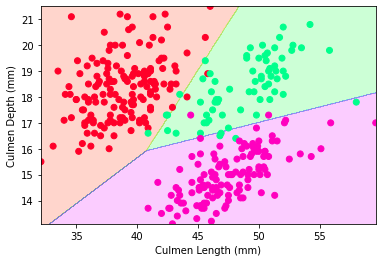

In [14]:
x0=X['Culmen Length (mm)']
x1=X['Culmen Depth (mm)']

X=subpenguins[['Culmen Length (mm)','Culmen Depth (mm)']]
y=subpenguins['Species']

from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
plot_regions(LR,X,y)


<font color = "chocolate">
    
# Discussion

<font color = "chocolate">

### Describe the performance of your models, and state which combination of model and measurements you recommend. Discuss how the model could be improved if more or different data were available. Describe possible dangers associated with interpreting or using the model.


> Ultimately, our Decision Tree Model had a high accuracy on predicting unforseen data (~95.6%). We believe that this is because our measurements/columns were all innately connected and relevant to each other as well as to each unique species. We chose to use Culmen Length, Culmen Depth, and Body Mass because we believed that in the process of speciation, the formation of new and distinct species in the course of evolution, they would have had a significantly high variability compared to other measurements. The models we used allowed us to visualize the distinct values of each measurement as expresesd by each unique species. 


>Figure 2 allowed us to see the relationship between the the three measurements that we chose, showing us the distinct ranges of their relationship and more importantly the intersection between them. The intersection we found between these measurements are helpful because they show us how the distinct values exist within the same range, but represent different species. With this information, we are able to note which species share a close resemblance in values within a given measurement, allowing us to discern the important differences and similarities.

>Figure 3 shows most clearly that, on average, there are outliers within the three species when looking at one measurement. For example, the first and second subplot clearly illustrate that the gentoo penguin's average for both Culmen Depth and Body Mass is vastly different from the other two species. Similarly, the second subplot of of figure 3  shows that Adelie Penguins are an outlier when we look at the average Culmen Length between the three species. This is important because this scenerio implies that an outlier value for this measurement, A.K.A. a penguin with a drastic value in Culmen Length, is likely to be an Adelie. This visualization of the data makes it evident that Culmen Length should be the most prominent factor to consider when we try to predict the species of a penguin, which is backed up by the organization of our Decision tree which also prioritizes Culmen Length first.

> With all of this information, we were able to make smart decision regarding the choice of our models and reinforce the use of our chosen measurements.

### Possible dangers.

>For these reasons, we would recommend using Culmen Length as atleast one of the measurements to predict penguin species. The main reason for this is because of what we learned through the use of a boxplot; a plot that clearly denotes which measurements are most efficient in showing significant variability/differences within species. Similarly, we would recommend using Decision Tree Models since the order of organization serves as a hint into which measurements play a large part in species prediction. We think that overall, Culmen Length seems to be the most important measurement, while Decision Tree Models seems to be the most important model. 


<figure class="image" style="width:50%">
  <img src="https://c.tenor.com/u97XzGLsUFQAAAAC/private-skipper.gif" 
       alt="Penguins from Madagascar smiling and waving B)." width="500px"> 
  <figcaption><b>Thanks! </b></figcaption>
</figure>